In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
app=pd.read_csv('application_record.csv')

In [3]:
cd=pd.read_csv('credit_record.csv')

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [7]:
app.shape

(438557, 18)

In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
cd.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [10]:
cd.shape

(1048575, 3)

In [11]:
#here we can connect the two data set using the Id


In [12]:
app.ID.nunique() # the total rows are 438,557. This means it has duplicates

438510

In [13]:
cd.ID.nunique()# this has around 43,000 unique rows as there are repeating entries for different monthly values and status

45985

In [14]:
# checking to see how many records match in two datasets

len(set(cd.ID).intersection(set(app.ID)))

36457

In [15]:
 # checking for null values
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [16]:
cd.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [17]:
#we delete the duplicates
app=app.drop_duplicates('ID',keep='last')

In [18]:
app.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [19]:
ot=pd.DataFrame(app.dtypes=='object').reset_index()
object_type=ot[ot[0]==True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [20]:
'''num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS'''

"num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})\nnum_type = num_type[num_type['yes/no'] ==True]['index']\n#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS\n# IT IS NEEDED IN FURTHER ANALYSIS"

In [21]:
#joining the two dataset

In [22]:
df=app.join(cd.set_index('ID'),on='ID',how='inner')

In [23]:
df.drop([ 'MONTHS_BALANCE'], axis=1, inplace=True)

In [24]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C


# CODE_GENDER

In [25]:
df.CODE_GENDER.value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

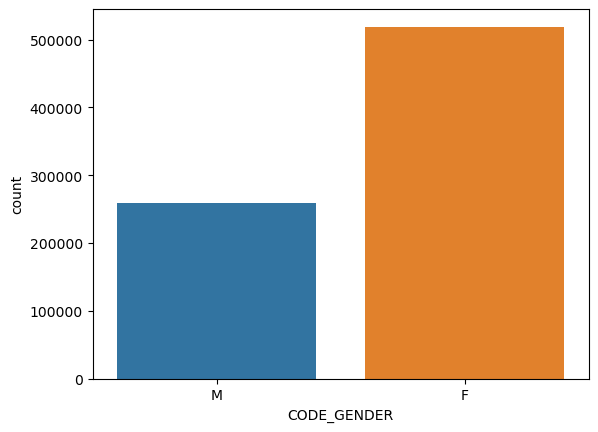

In [26]:
sns.countplot(df.CODE_GENDER)

In [27]:
a=pd.crosstab(df.CODE_GENDER,df.STATUS)
chi2_contingency(a)[1]

3.634048908463986e-77

# FLAG_OWN_CAR

In [28]:
df.FLAG_OWN_CAR.value_counts()

N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

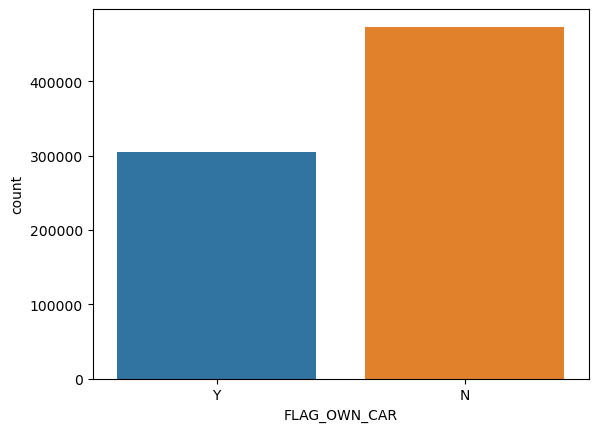

In [29]:
sns.countplot(df.FLAG_OWN_CAR)

In [30]:
a=pd.crosstab(df.FLAG_OWN_CAR,df.STATUS)
chi2_contingency(a)[1]

4.0451520808913785e-25

In [31]:
df.drop('FLAG_OWN_CAR',axis=1,inplace=True)

# FLAG_OWN_REALTY

In [32]:
df.FLAG_OWN_REALTY.value_counts()

Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

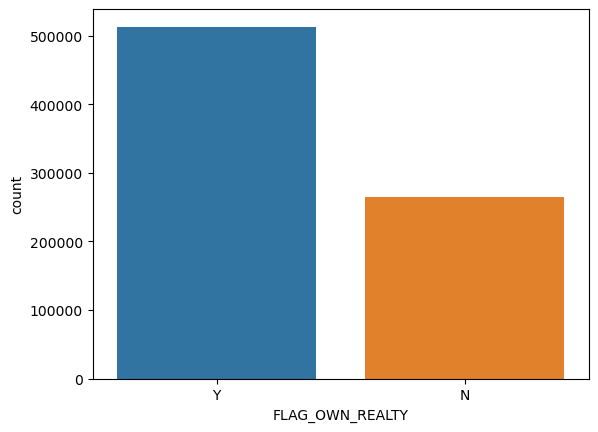

In [33]:
sns.countplot(df.FLAG_OWN_REALTY)

In [34]:
a=pd.crosstab(df.FLAG_OWN_REALTY,df.STATUS)
chi2_contingency(a)[1]

4.518711527623754e-31

# NAME_INCOME_TYPE

In [35]:
df.NAME_INCOME_TYPE.value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

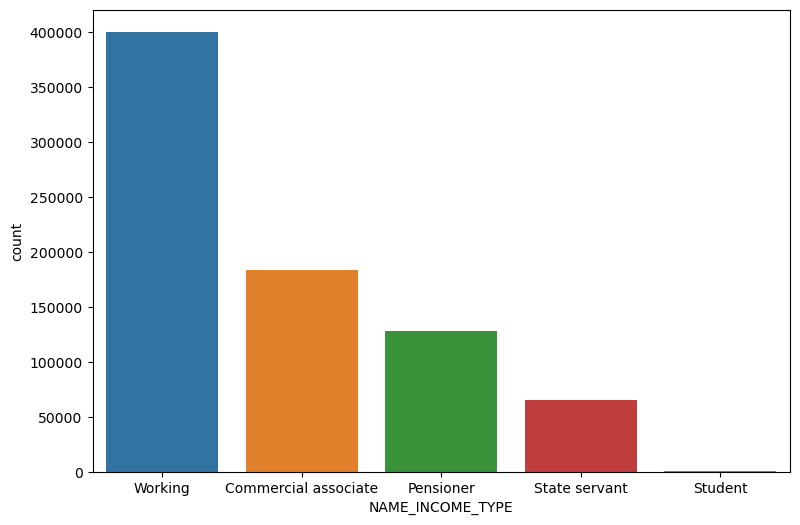

In [36]:
plt.figure(figsize=(9,6))
sns.countplot(df.NAME_INCOME_TYPE)

In [37]:
a=pd.crosstab(df.NAME_INCOME_TYPE,df.STATUS)
chi2_contingency(a)[1]

4.361362749105315e-93

# NAME_EDUCATION_TYPE

In [38]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

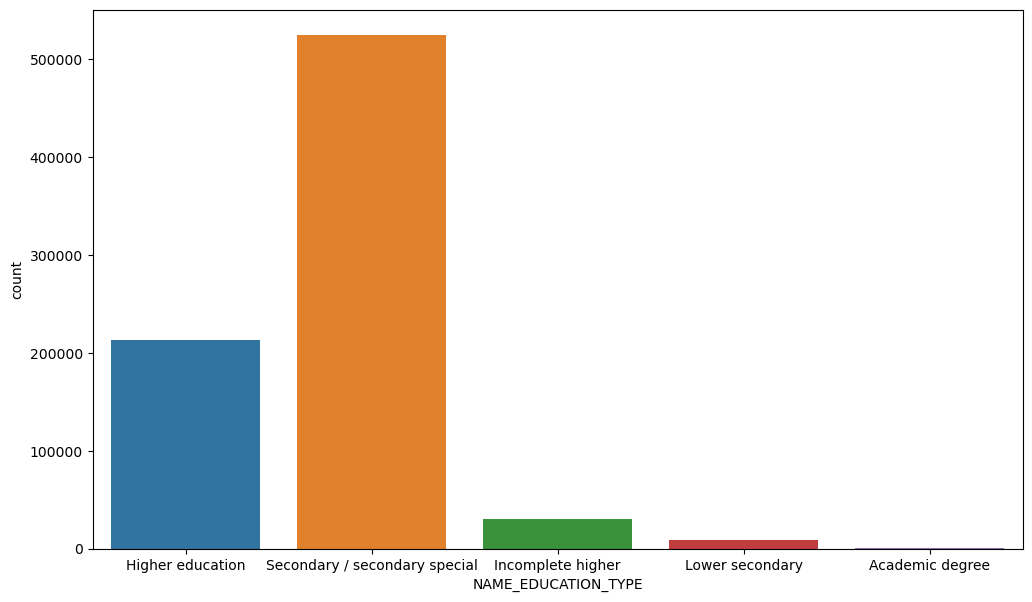

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(df.NAME_EDUCATION_TYPE)

In [40]:
a=pd.crosstab(df.NAME_EDUCATION_TYPE,df.STATUS)
chi2_contingency(a)[1]

9.217749865814039e-205

# NAME_FAMILY_STATUS

In [41]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

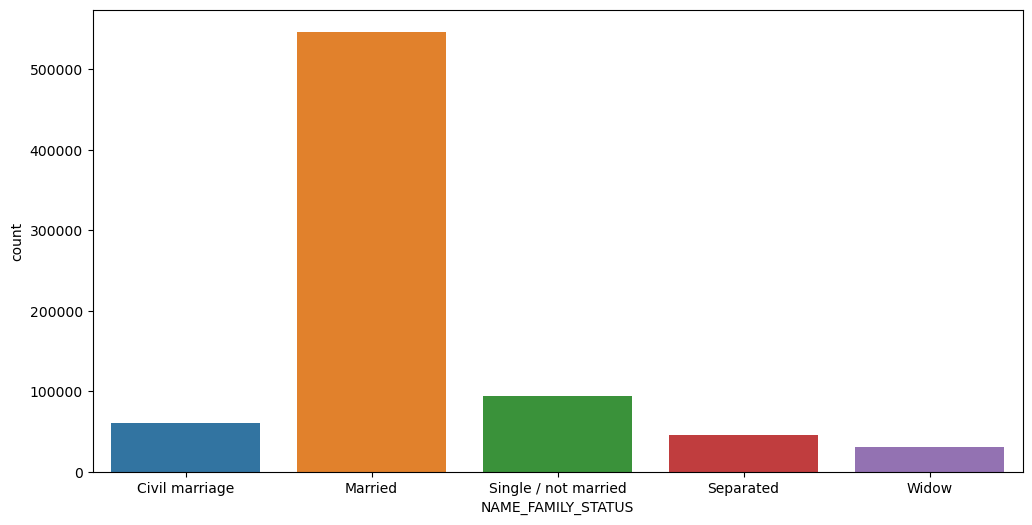

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(df.NAME_FAMILY_STATUS)

In [43]:
a=pd.crosstab(df.NAME_FAMILY_STATUS,df.STATUS)
chi2_contingency(a)[1]

6.313775798482449e-116


# NAME_HOUSING_TYPE

In [44]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

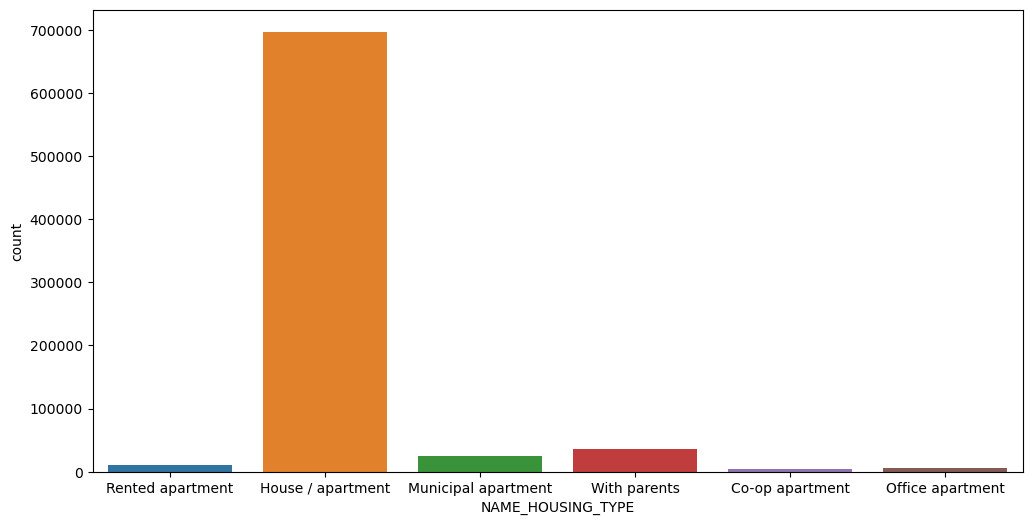

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(df.NAME_HOUSING_TYPE)

In [46]:
a=pd.crosstab(df.NAME_HOUSING_TYPE,df.STATUS)
chi2_contingency(a)[1]

5.329895935440666e-97

# CNT_CHILDREN

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Density'>

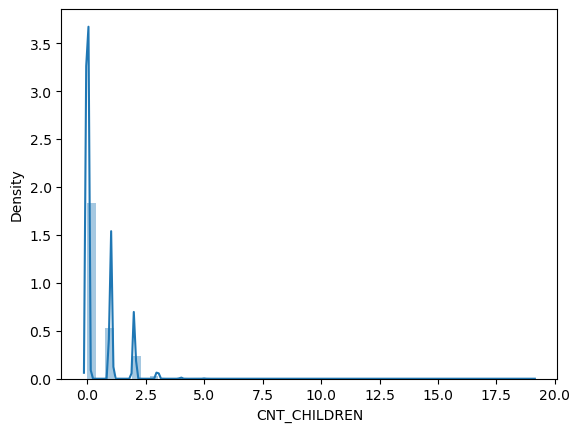

In [47]:
sns.distplot(df.CNT_CHILDREN)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

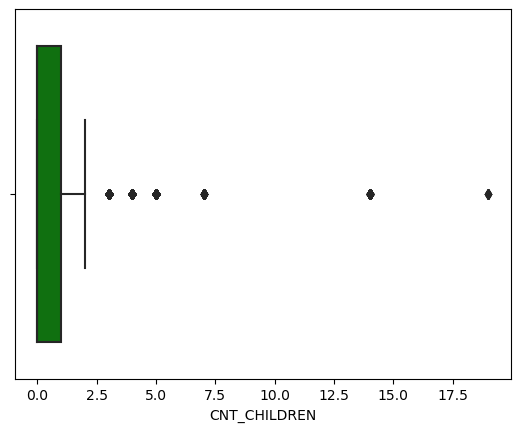

In [48]:
sns.boxplot(df.CNT_CHILDREN,color='green')

In [49]:
q1=df.CNT_CHILDREN.quantile(0.25)
q3=df.CNT_CHILDREN.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [50]:
df.CNT_CHILDREN=np.where(df.CNT_CHILDREN>upper,upper,df.CNT_CHILDREN)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

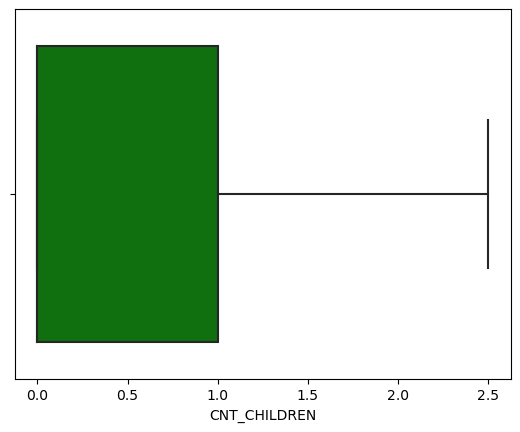

In [51]:
sns.boxplot(df.CNT_CHILDREN,color='green')

In [52]:
model = ols("CNT_CHILDREN~STATUS", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                df        sum_sq  mean_sq        F   PR(>F)
STATUS         7.0      13.60322  1.94332  4.07141  0.00018
Residual  777707.0  371206.19513  0.47731      NaN      NaN


# AMT_INCOME_TOTAL

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

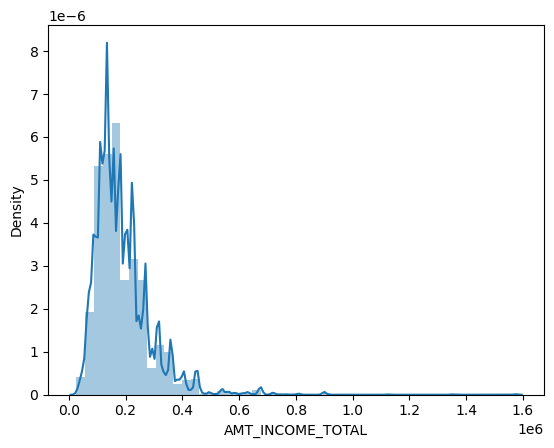

In [53]:
sns.distplot(df.AMT_INCOME_TOTAL)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

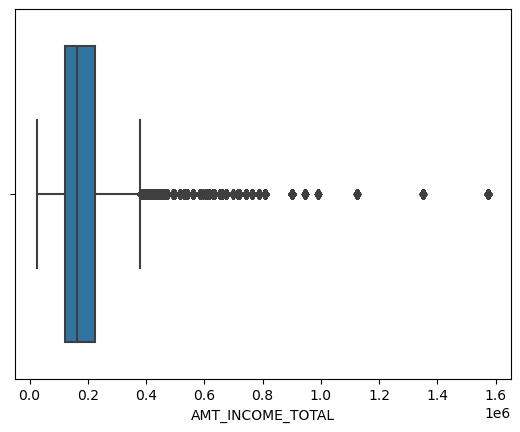

In [54]:
sns.boxplot(df.AMT_INCOME_TOTAL)

In [55]:
q1=df.AMT_INCOME_TOTAL.quantile(0.25)
q3=df.AMT_INCOME_TOTAL.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [56]:
df.AMT_INCOME_TOTAL=np.where(df.AMT_INCOME_TOTAL>upper,upper,df.AMT_INCOME_TOTAL)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

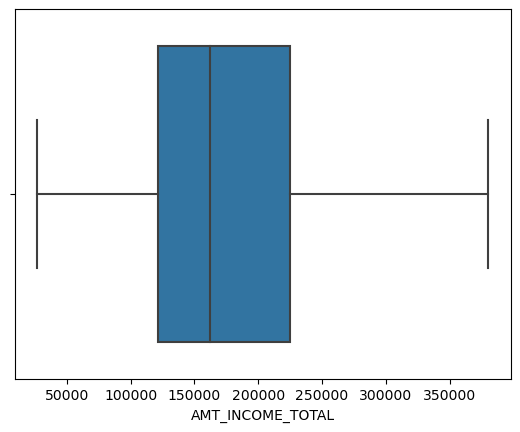

In [57]:
sns.boxplot(df.AMT_INCOME_TOTAL)

In [58]:
model = ols("AMT_INCOME_TOTAL~STATUS", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                df        sum_sq       mean_sq          F  PR(>F)
STATUS         7.0  5.825074e+12  8.321534e+11  124.13659     0.0
Residual  777707.0  5.213383e+15  6.703530e+09        NaN     NaN


# DAYS_BIRTH

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

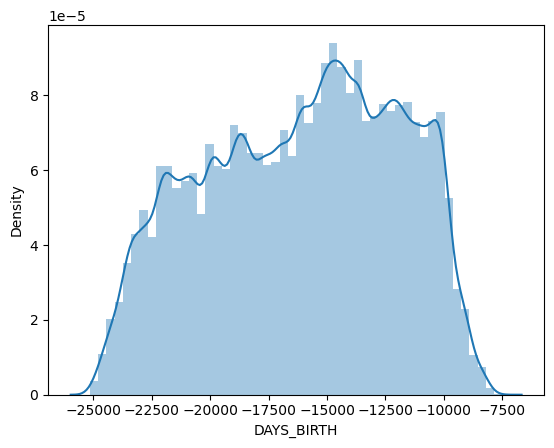

In [59]:
sns.distplot(df.DAYS_BIRTH)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_BIRTH'>

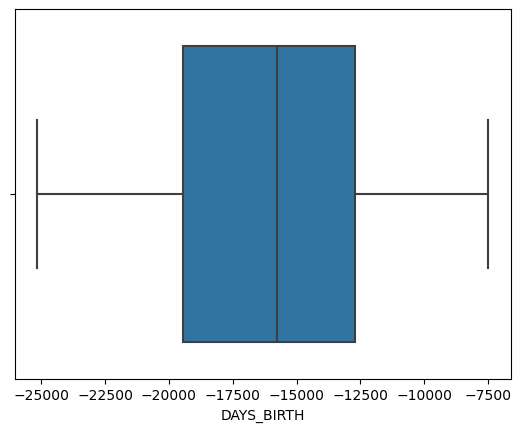

In [60]:
sns.boxplot(df.DAYS_BIRTH)

In [61]:
model = ols("DAYS_BIRTH~STATUS", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                df        sum_sq       mean_sq         F  PR(>F)
STATUS         7.0  8.522446e+09  1.217492e+09  72.32124     0.0
Residual  777707.0  1.309231e+13  1.683450e+07       NaN     NaN


# DAYS_EMPLOYED

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

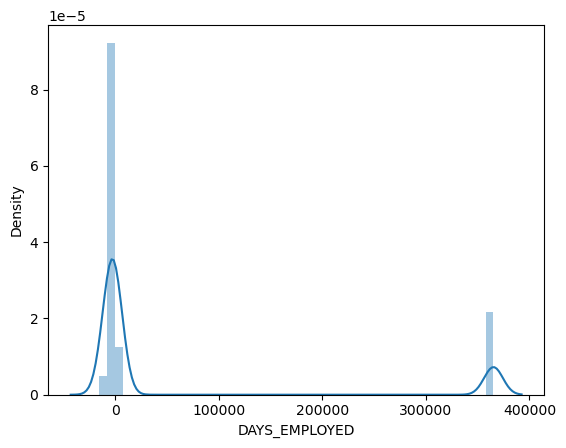

In [62]:
sns.distplot(df.DAYS_EMPLOYED)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

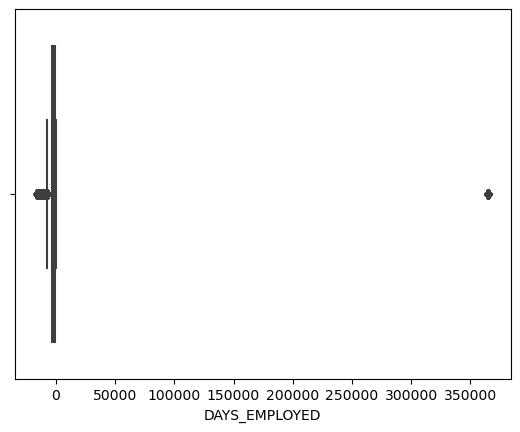

In [63]:
sns.boxplot(df.DAYS_EMPLOYED)

In [64]:
q1=df.DAYS_EMPLOYED.quantile(0.25)
q3=df.DAYS_EMPLOYED.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [65]:
df.drop(df[df.DAYS_EMPLOYED>150000].index,axis=0,inplace=True)

In [66]:
df.DAYS_EMPLOYED=np.where(df.DAYS_EMPLOYED>upper,upper,df.DAYS_EMPLOYED)
df.DAYS_EMPLOYED=np.where(df.DAYS_EMPLOYED<lower,lower,df.DAYS_EMPLOYED)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

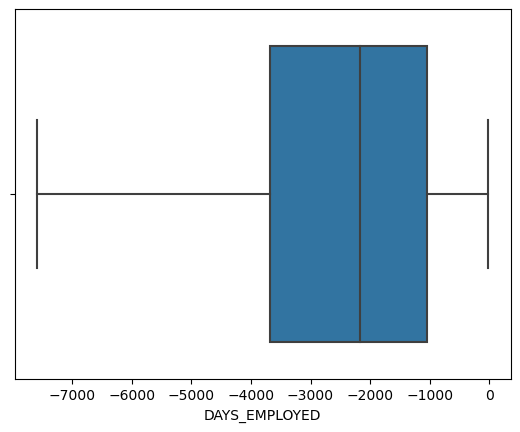

In [67]:
sns.boxplot(df.DAYS_EMPLOYED)

In [68]:
model = ols("DAYS_EMPLOYED~STATUS", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                df        sum_sq       mean_sq         F  PR(>F)
STATUS         7.0  1.335545e+09  1.907922e+08  44.96054     0.0
Residual  649735.0  2.757182e+12  4.243548e+06       NaN     NaN


# FLAG_MOBIL

In [69]:
df.FLAG_MOBIL.value_counts()

1    649743
Name: FLAG_MOBIL, dtype: int64

In [70]:
df.drop('FLAG_MOBIL',axis=1,inplace=True)

# FLAG_WORK_PHONE

In [71]:
df.FLAG_WORK_PHONE.value_counts()

0    469455
1    180288
Name: FLAG_WORK_PHONE, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_WORK_PHONE', ylabel='count'>

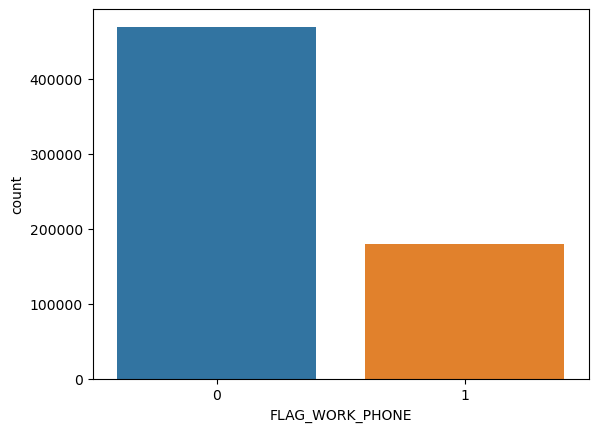

In [72]:
sns.countplot(df.FLAG_WORK_PHONE)

In [73]:
a=pd.crosstab(df.FLAG_WORK_PHONE,df.STATUS)
chi2_contingency(a)[1]

2.464761827084764e-49

# FLAG_PHONE

In [74]:
df.FLAG_PHONE.value_counts()

0    452433
1    197310
Name: FLAG_PHONE, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_PHONE', ylabel='count'>

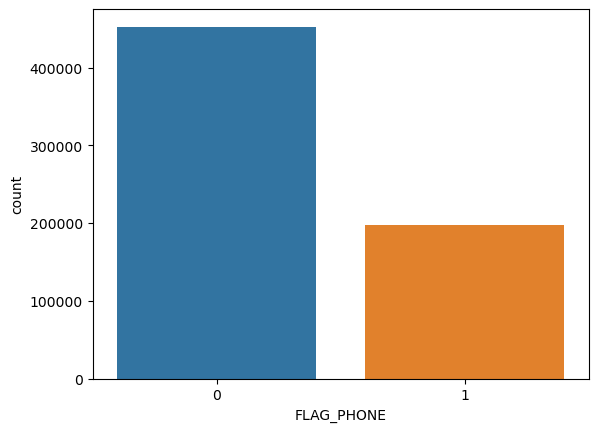

In [75]:
sns.countplot(df.FLAG_PHONE)

In [76]:
a=pd.crosstab(df.FLAG_PHONE,df.STATUS)
chi2_contingency(a)[1]

1.152418969736349e-93

# FLAG_EMAIL

In [77]:
df.FLAG_EMAIL.value_counts()

0    583254
1     66489
Name: FLAG_EMAIL, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_EMAIL', ylabel='count'>

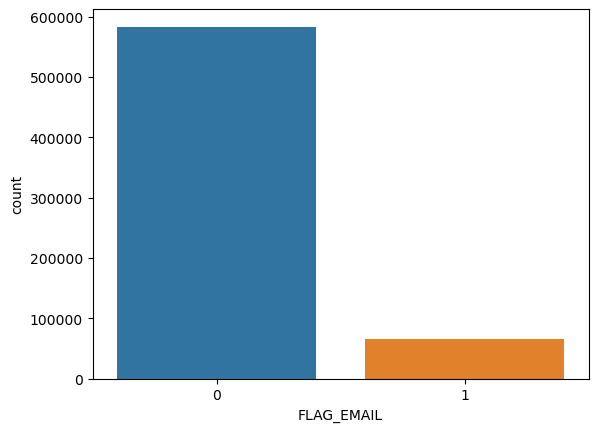

In [78]:
sns.countplot(df.FLAG_EMAIL)

In [79]:
a=pd.crosstab(df.FLAG_EMAIL,df.STATUS)
chi2_contingency(a)[1]

4.608031036384034e-19

# CNT_FAM_MEMBERS

In [80]:
df.CNT_FAM_MEMBERS.value_counts()#ordinal

2.0     338070
3.0     131805
1.0     103223
4.0      66144
5.0       8869
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

In [81]:
df.CNT_FAM_MEMBERS.nunique()

10

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

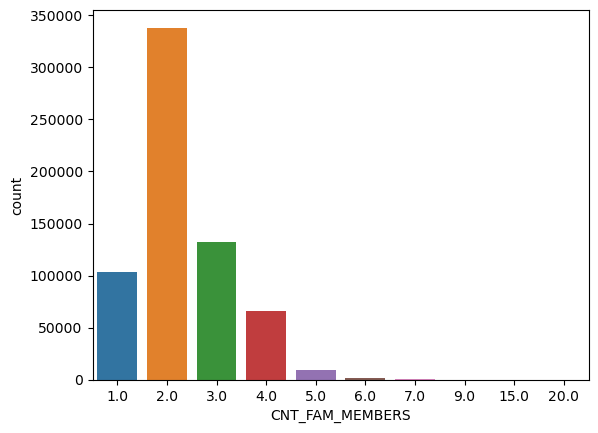

In [82]:
sns.countplot(df.CNT_FAM_MEMBERS)

In [83]:
model = ols("CNT_FAM_MEMBERS~STATUS", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                df        sum_sq  mean_sq        F   PR(>F)
STATUS         7.0      20.84348  2.97764  3.39716  0.00125
Residual  649735.0  569499.11571  0.87651      NaN      NaN


In [84]:
df.STATUS.value_counts()

C    274364
0    243034
X    122423
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [85]:
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [86]:
df.STATUS.replace({'C':0,'X':0},inplace=True)

In [87]:
df.STATUS.value_counts()

0    396787
0    243034
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [88]:
df['STATUS'] = df['STATUS'].astype('int')

In [89]:
df['STATUS'] = df['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [90]:
df.STATUS.value_counts(normalize=True)

0    0.996456
1    0.003544
Name: STATUS, dtype: float64

In [91]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0


In [92]:
#we are grouping the data in crecord by ID so that we can join it with app

In [93]:
#Label encoder

In [94]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0
0,5008804,M,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le=LabelEncoder()
df.CODE_GENDER=le.fit_transform(df.CODE_GENDER)

In [97]:
df.FLAG_OWN_REALTY=le.fit_transform(df.FLAG_OWN_REALTY)

In [98]:
d=pd.get_dummies(df.NAME_INCOME_TYPE,drop_first=True)

In [99]:
df=pd.concat([df,d],axis=1)

In [100]:
df.drop('NAME_INCOME_TYPE',axis=1,inplace=True)

In [101]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,Pensioner,State servant,Student,Working
0,5008804,1,1,0.0,380250.0,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0,0,0,0,1
0,5008804,1,1,0.0,380250.0,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0,0,0,0,1
0,5008804,1,1,0.0,380250.0,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0,0,0,0,1
0,5008804,1,1,0.0,380250.0,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0,0,0,0,1
0,5008804,1,1,0.0,380250.0,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0,0,0,0,0,1


In [103]:
d=pd.get_dummies(df.NAME_FAMILY_STATUS,drop_first=True)

In [105]:

df=pd.concat([df,d],axis=1)

In [106]:

df.drop('NAME_FAMILY_STATUS',axis=1,inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,STATUS,Pensioner,State servant,Student,Working,Married,Separated,Single / not married,Widow
0,5008804,1,1,0.0,380250.0,Higher education,Rented apartment,-12005,-4542.0,1,...,2.0,0,0,0,0,1,0,0,0,0
0,5008804,1,1,0.0,380250.0,Higher education,Rented apartment,-12005,-4542.0,1,...,2.0,0,0,0,0,1,0,0,0,0
0,5008804,1,1,0.0,380250.0,Higher education,Rented apartment,-12005,-4542.0,1,...,2.0,0,0,0,0,1,0,0,0,0
0,5008804,1,1,0.0,380250.0,Higher education,Rented apartment,-12005,-4542.0,1,...,2.0,0,0,0,0,1,0,0,0,0
0,5008804,1,1,0.0,380250.0,Higher education,Rented apartment,-12005,-4542.0,1,...,2.0,0,0,0,0,1,0,0,0,0


In [108]:
d=pd.get_dummies(df.NAME_HOUSING_TYPE,drop_first=True)
df=pd.concat([df,d],axis=1)
df.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,Working,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008804,1,1,0.0,380250.0,Higher education,-12005,-4542.0,1,0,...,1,0,0,0,0,0,0,0,1,0
0,5008804,1,1,0.0,380250.0,Higher education,-12005,-4542.0,1,0,...,1,0,0,0,0,0,0,0,1,0
0,5008804,1,1,0.0,380250.0,Higher education,-12005,-4542.0,1,0,...,1,0,0,0,0,0,0,0,1,0
0,5008804,1,1,0.0,380250.0,Higher education,-12005,-4542.0,1,0,...,1,0,0,0,0,0,0,0,1,0
0,5008804,1,1,0.0,380250.0,Higher education,-12005,-4542.0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [132]:
d=pd.get_dummies(df['NAME_EDUCATION_TYPE'],drop_first=True)
df=pd.concat([df,d],axis=1)
df.drop('NAME_EDUCATION_TYPE',axis=1,inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,Office apartment,Rented apartment,With parents,Incomplete higher,Lower secondary,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,5008804,1,1,0.0,380250.0,-12005,-4542.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
0,5008804,1,1,0.0,380250.0,-12005,-4542.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
0,5008804,1,1,0.0,380250.0,-12005,-4542.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
0,5008804,1,1,0.0,380250.0,-12005,-4542.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
0,5008804,1,1,0.0,380250.0,-12005,-4542.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [133]:
#df.to_csv('Credit_card.csv')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649743 entries, 0 to 434812
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             649743 non-null  int64  
 1   CODE_GENDER                    649743 non-null  int32  
 2   FLAG_OWN_REALTY                649743 non-null  int32  
 3   CNT_CHILDREN                   649743 non-null  float64
 4   AMT_INCOME_TOTAL               649743 non-null  float64
 5   DAYS_BIRTH                     649743 non-null  int64  
 6   DAYS_EMPLOYED                  649743 non-null  float64
 7   FLAG_WORK_PHONE                649743 non-null  int64  
 8   FLAG_PHONE                     649743 non-null  int64  
 9   FLAG_EMAIL                     649743 non-null  int64  
 10  CNT_FAM_MEMBERS                649743 non-null  float64
 11  STATUS                         649743 non-null  int64  
 12  Pensioner                     

In [135]:
#Dealing with imbalanced data
#Smote

In [136]:
from sklearn.utils import resample 

In [137]:
df.STATUS.value_counts()

0    647440
1      2303
Name: STATUS, dtype: int64

In [138]:
zero=df[df.STATUS==0]
one=df[df.STATUS==1]

In [139]:
over=resample(one,replace=True,n_samples=len(zero),random_state=27)

In [140]:
df_mo=pd.concat([zero,over])

In [141]:
df_mo.STATUS.value_counts()

0    647440
1    647440
Name: STATUS, dtype: int64

In [142]:
x=df_mo.iloc[:,1:-1]

In [143]:
y=df_mo.iloc[:,-1]

In [144]:

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294880 entries, 0 to 42360
Data columns (total 30 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CODE_GENDER                    1294880 non-null  int32  
 1   FLAG_OWN_REALTY                1294880 non-null  int32  
 2   CNT_CHILDREN                   1294880 non-null  float64
 3   AMT_INCOME_TOTAL               1294880 non-null  float64
 4   DAYS_BIRTH                     1294880 non-null  int64  
 5   DAYS_EMPLOYED                  1294880 non-null  float64
 6   FLAG_WORK_PHONE                1294880 non-null  int64  
 7   FLAG_PHONE                     1294880 non-null  int64  
 8   FLAG_EMAIL                     1294880 non-null  int64  
 9   CNT_FAM_MEMBERS                1294880 non-null  float64
 10  STATUS                         1294880 non-null  int64  
 11  Pensioner                      1294880 non-null  uint8  
 12  State servant   

In [145]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1294880 entries, 0 to 42360
Series name: Secondary / secondary special
Non-Null Count    Dtype
--------------    -----
1294880 non-null  uint8
dtypes: uint8(1)
memory usage: 11.1 MB


In [146]:
#Splitting the dataset into the Training set and Test set

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [150]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [155]:
y_pred=model.predict(xtest)

In [156]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[151738      2]
 [     0 236724]]


In [157]:
#accuracy
accuracy_score(ytest,y_pred)

0.9999948515177726

In [158]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151740
           1       1.00      1.00      1.00    236724

    accuracy                           1.00    388464
   macro avg       1.00      1.00      1.00    388464
weighted avg       1.00      1.00      1.00    388464



In [159]:
#ROC
y_pred_prob=model.predict_proba(xtest)
fpr,tpr,th=roc_curve(ytest,y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)

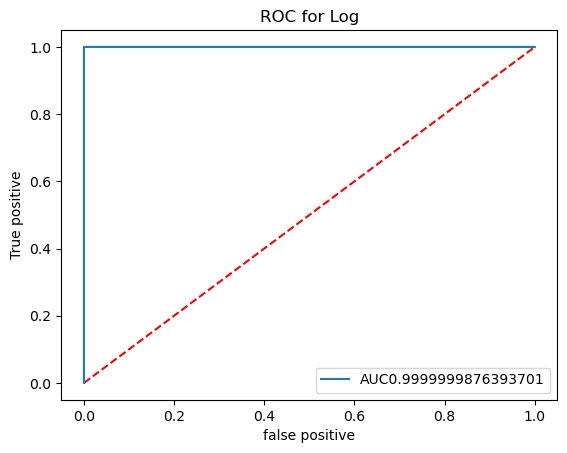

In [160]:
plt.title('ROC for Log')
plt.xlabel('false positive')
plt.ylabel('True positive')
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='AUC'+str(roc_auc))
plt.legend(loc=4)

plt.show()

In [171]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtest, ytest)
Y_pred = random_forest.predict(xtest)
random_forest.score(xtest, ytest)
acc_random_forest = round(random_forest.score(xtest, ytest) * 100, 2)
acc_random_forest

100.0